<a href="https://colab.research.google.com/github/up3082002/DATA-SCIENCE-PROJECTS/blob/main/Instagram%20reach%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf


In [ ]:

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/instagram_reach.csv')
data.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


1.) Plotting word clouds for Captions and hashTags.

2.) developing a relationship between followers and likes.

3.) Time posted and Likes

In [ ]:
def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show()

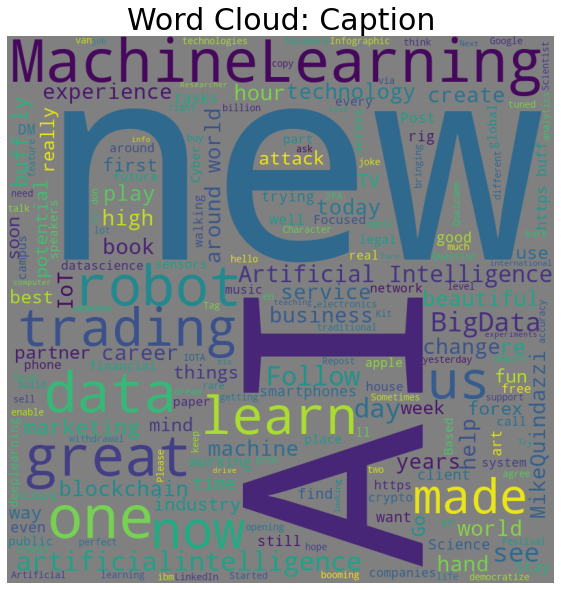

In [ ]:
WordCloudPlotter('Caption')

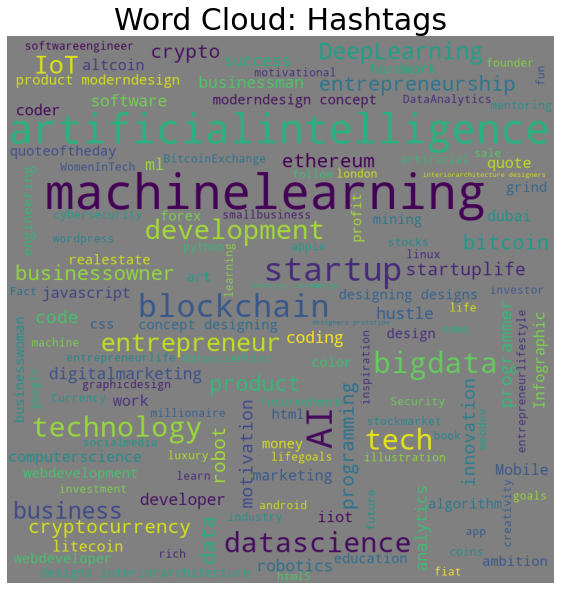

In [ ]:
WordCloudPlotter('Hashtags')

In [ ]:
data['Time since posted'] = data['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [ ]:
# Plotting Likes relationship with
# Followers and Hours since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = data, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

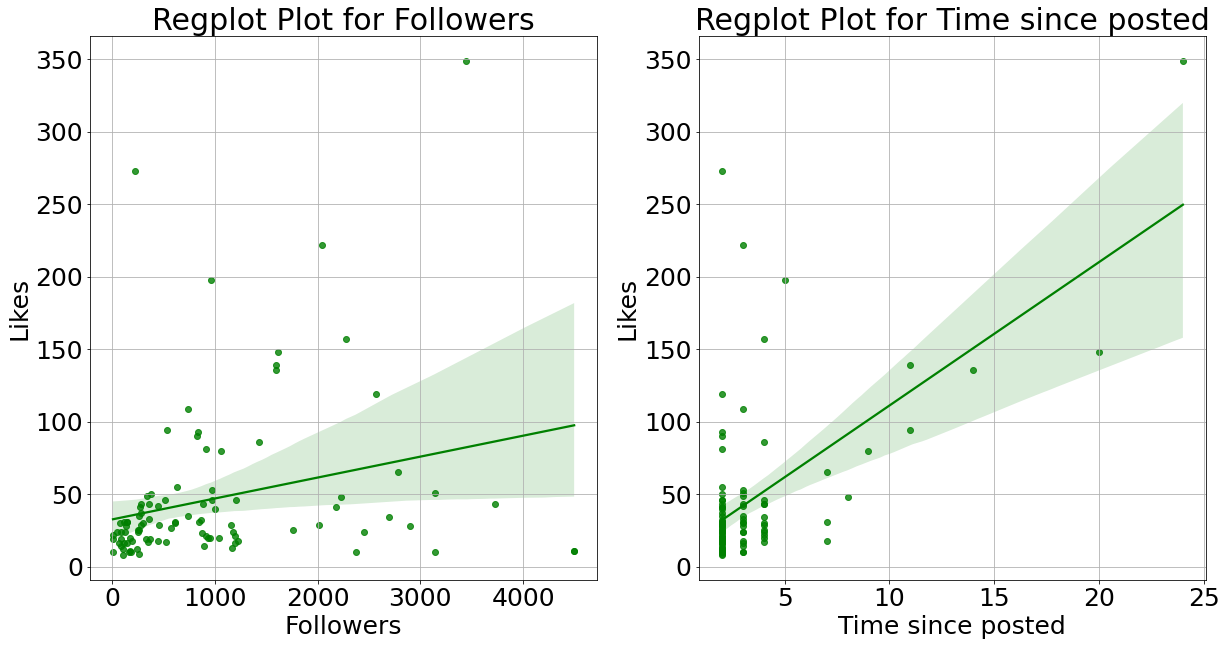

In [ ]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

In [ ]:
featureVector = np.array(data[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(data['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [ ]:
data.Likes.max()

349

In [ ]:
targets = targets/maxValLikes
targets

array([1.14120578e-03, 1.88832593e-04, 2.05252814e-04, 4.02295525e-04,
       2.46303418e-04, 1.47782048e-04, 2.87353963e-04, 7.06069754e-04,
       1.80622475e-04, 1.47782048e-04, 2.54513521e-04, 3.94085422e-04,
       6.56809076e-04, 7.71750580e-04, 2.29883153e-04, 4.35135968e-04,
       2.38093271e-04, 3.77665187e-04, 2.46303418e-04, 2.79143860e-04,
       1.62560248e-03, 1.55992151e-04, 1.64202269e-04, 9.03112377e-05,
       8.21011345e-05, 3.77665187e-04, 2.05252814e-04, 1.21509680e-03,
       3.53034877e-04, 3.03774199e-04, 7.38910167e-04, 1.55992151e-04,
       1.14941577e-04, 2.46303418e-04, 2.24136095e-03, 1.06731466e-04,
       7.63540564e-04, 1.97042711e-04, 1.47782048e-04, 1.11657544e-03,
       1.97042711e-04, 6.56809061e-05, 3.36614641e-04, 6.65019208e-04,
       1.31361812e-04, 2.54513521e-04, 1.97042711e-04, 4.18715761e-04,
       3.53034877e-04, 1.64202269e-04, 2.05252814e-04, 1.28898781e-03,
       1.39571930e-04, 1.97042711e-04, 5.33657381e-04, 2.86532962e-03,
      

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

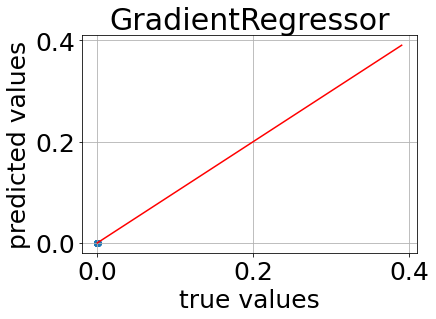

In [ ]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'red')
plt.grid(True)

In [ ]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()


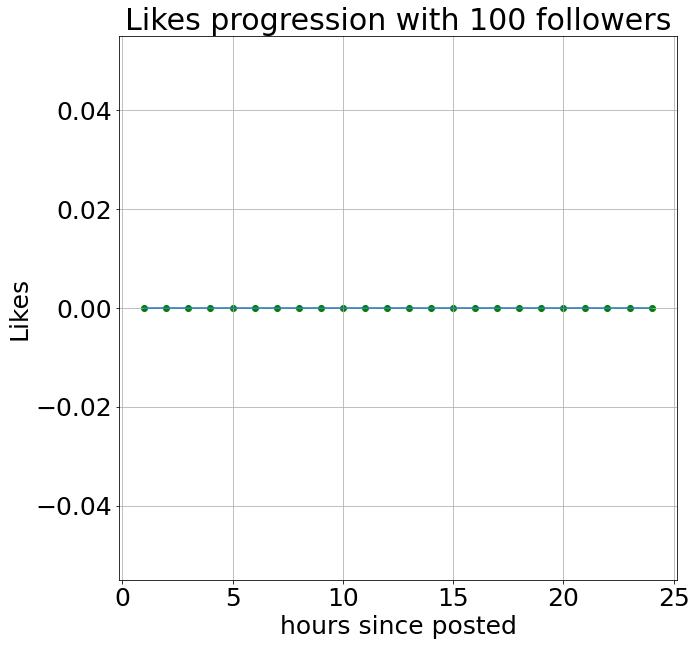

In [ ]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)
